#Importing Dataset from Kaggle

In [0]:
# #To upload kaggle.json file
# from google.colab import files
# files.upload()

In [0]:
#install kaggle packages
!pip install -q kaggle
!pip install -q kaggle-cli

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

In [0]:
#Extract The dataset
!unzip creditcardfraud.zip

#Data Exploration

In [0]:
#import needed libraries

#for Data Manipulation
import pandas as pd 
import numpy as np

#For data visualization 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 


In [3]:
#load the dataset 
data = pd.read_csv('creditcard.csv')

#display first 5 transactions 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Check if there's a missing data at each column
data.isnull().sum().max()

0

In [5]:
#check data formating
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#Descriptive analysis
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#Data Visualization
1. proportion of Fraudulent transaction
2. correlation between the features
3. plot the relation between the dependent values and amount with hue.

<function matplotlib.pyplot.show>

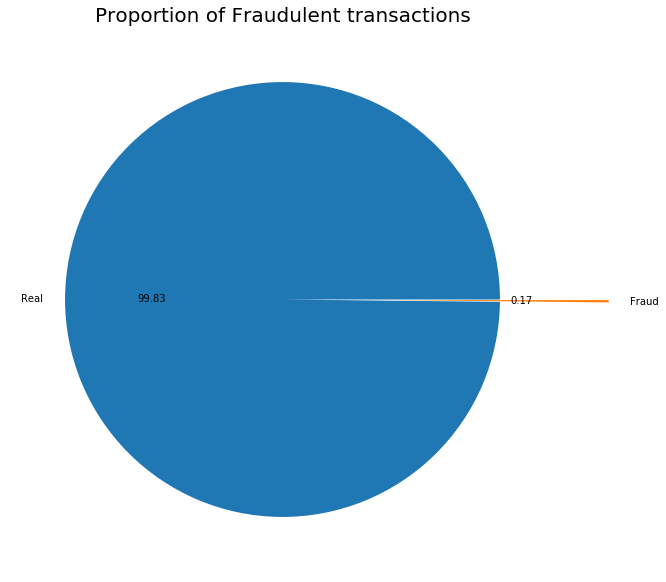

In [7]:
#create a list 
real_fraud = [data.Class[data['Class']==0].count(), data.Class[data['Class']==1].count()]

#set figure size
plt.subplots(figsize = (10,10))
#add title
plt.title('Proportion of Fraudulent transactions', size = 20)

#plot the proportion
plt.pie(real_fraud, labels=['Real','Fraud'], autopct = '%.2f', explode = (0, 0.5))
plt.show

**Notes:**
- The data is totally unbalanced, Evaluate modeling on unbalanced data is a terrible mistake. Will see later why and how to work with unbalanced data.


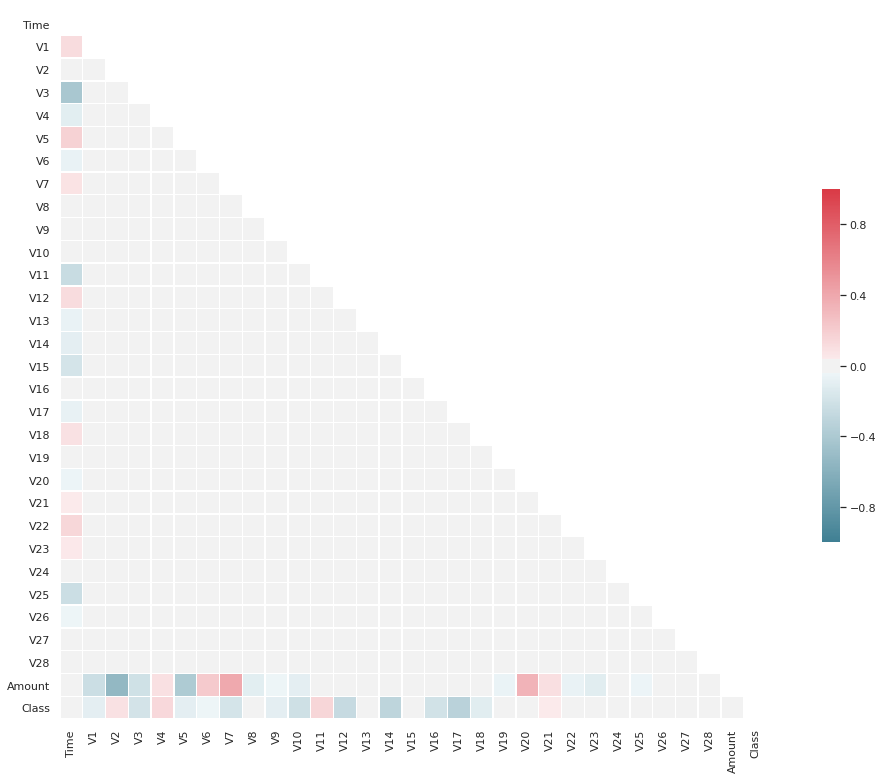

In [8]:
#Calculate the correlation 
corr = data.corr()

#change sns style
sns.set(style="white")


## Plotting Diagonal correlation
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set figure size 
plt.subplots(figsize=(20,13))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

**Notes:** 
 * Almost there's no correlation between our target "Class" and Time.
 * Almost there's no correlation between our target "Class" and V8.
 * Almost there's no correlation between our target "Class" and V13.
 * Almost there's no correlation between our target "Class" and  V15.
 * Almost there's no correlation between our target "Class" and V19.
 * Almost there's no correlation between our target "Class" and V20.
 * Almost there's no correlation between our target "Class" and V22.
 * Almost there's no correlation between our target "Class" and V23.
 * Almost there's no correlation between our target "Class" and V24.
 * Almost there's no correlation between our target "Class" and V25.
 * Almost there's no correlation between our target "Class" and V26.
 * Almost there's no correlation between our target "Class" and V27.
 * Almost there's no correlation between our target "Class" and  V28.
 * Almost there's no correlation between our target "Class" and  Amount.
 * There's correlation between amount and the other features.

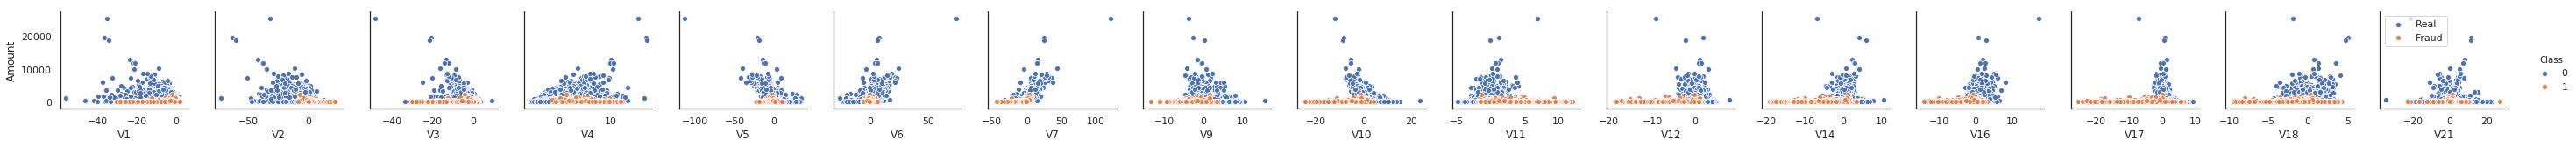

In [9]:
# Plot the relation between the dependent values 
sns.pairplot(data, hue="Class", x_vars=['V1','V2','V3','V4','V5','V6', 'V7','V9','V10',
                                        'V11','V12','V14','V16', 'V17','V18','V21'],
                                y_vars=['Amount'])
#Add legend
plt.legend(labels=['Real', 'Fraud'])

# Preprocessing

##Data Cleaning

In [10]:
data.drop(['Time', 'V8', 'V13', 'V15', 'V19', 'V20',
           'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis = 1, inplace = True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.018307,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.225775,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.247998,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,-0.009431,69.99,0


##Data Normalization


 Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

In [11]:
#using simple scaling to rescale amount, range (0,1)
data['Amount'] = data['Amount'] / data['Amount'].max()
data.head()


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.018307,0.005824,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.225775,0.000105,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.247998,0.014739,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,0.004807,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,-0.009431,0.002724,0


## Shuffle and Split Data


In [12]:
# Split the data into features and target label
features = data.drop(['Class'], axis =1)
target = data['Class']

# Split the features into training and testing sets
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 200)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 227845 samples.
Testing set has 56962 samples.


#Model Evaluating

In [13]:
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.svm import SVC

# Create an object from Support Vector Machine Classifier with random state
clf = SVC(random_state=2540)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict
prediction_train = clf.predict(X_train)
prediction_test = clf.predict(X_test)

# Calculate accuracy score
acc_train = accuracy_score(y_train, prediction_train)
acc_test = accuracy_score(y_test, prediction_test)

# Calculate F-beta score
f_train = fbeta_score(y_train, prediction_train, beta=0.5)
f_test = fbeta_score(y_test, prediction_test, beta=0.5)

#print the results
print("Accuracy score on Training set: {:.2f}%".format(acc_train*100))
print("Accuracy score on Testing set: {:.2f}%".format(acc_test*100))
print("\nF-beta score on Training set: {:.4f}".format(f_train))
print("F-beta score on Testing set: {:.4f}".format(f_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy score on Training set: 99.97%
Accuracy score on Testing set: 99.94%

F-beta score on Training set: 0.9459
F-beta score on Testing set: 0.8918


In [14]:
from sklearn.metrics import recall_score, precision_score

recall_train = recall_score(y_train, prediction_train)
recall_test = recall_score(y_test, prediction_test)

precision_train = precision_score(y_train, prediction_train)
precision_test = precision_score(y_test, prediction_test)

print("Recall score on training set: {:.4f}".format(recall_train))
print("Recall score on testing set: {:.4f}".format(recall_test))
print("\nprecision score on training set: {:.4f}".format(precision_train))
print("precision score on testing set: {:.4f}".format(precision_test))

Recall score on training set: 0.8166
Recall score on testing set: 0.6489

precision score on training set: 0.9848
precision score on testing set: 0.9839


**Notes:**
 * High Precision Score on training and testing sets.
 * Low recall score on training set and on testing. What's the reason behind these results?
   * Evaluate modeling on unbalanced dataset. 

**How to deal with unbalanced data?**
* Collecting more data. It works but if we can collect more data.
* Resample data. " which we're gonna do "

In [15]:
# store No. of fraud and indices
fraud_records = data['Class'].sum()
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select number of normal records = number of fraud records 
random_normal_indices = np.random.choice(normal_indices, fraud_records, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Merge the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Copy under sample dataset  
under_sample_data = data.iloc[under_sample_indices,:]

# Split data into features and target labels 
features_undersample = under_sample_data.drop(['Class'], axis = 1)
target_undersample = under_sample_data['Class']

# Show ratio
print("Percentage of normal transactions: ", under_sample_data.Class[under_sample_data['Class'] == 0].count())
print("Percentage of fraud transactions: ", under_sample_data.Class[under_sample_data['Class'] == 1].count())
print("Total number of transactions in resampled data: ", under_sample_data['Class'].count())

Percentage of normal transactions:  492
Percentage of fraud transactions:  492
Total number of transactions in resampled data:  984


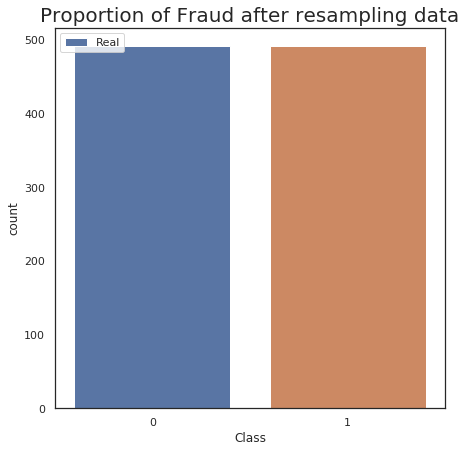

In [38]:
under_sample_Fraud_Real = [under_sample_data.Class[under_sample_data['Class'] == 0].count(), fraud_records]

# Plot the proportion 
plt.subplots(figsize = (7, 7))
plt.title("Proportion of Fraud after resampling data", size = 20)
ax = sns.countplot(x = under_sample_data['Class'], data= under_sample_data)
ax.legend(labels=['Real', 'Fraud'], loc = 'upper left')


## Shuffle and Split Data after Resampling 

In [39]:
# Split the 'features_undersample' and 'target_anderSample' data into training and testing sets
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(features_undersample,
                                                                                    target_undersample,
                                                                                    test_size = 0.15,
                                                                                    random_state = 25)

# Show the results of the split
print("Training set has {} samples.".format(X_train_sampled.shape[0]))
print("Testing set has {} samples.".format(X_test_sampled.shape[0]))

Training set has 836 samples.
Testing set has 148 samples.


In [40]:
# Fit the SVC classifier to the under_sample_data
clf.fit(X_train_sampled, y_train_sampled)

# Predict
prediction_train_sampled = clf.predict(X_train_sampled)
prediction_test_sampled = clf.predict(X_test_sampled)

# Calculate the Recall score on training and testing set for the sampled data
recall_train_sampled = recall_score(y_train_sampled, prediction_train_sampled)
recall_test_sampled = recall_score(y_test_sampled, prediction_test_sampled)

# Print Recall score on training and testing set for the sampled data
print('Recall score on training set of sampled data: {:.4f}'.format(recall_train_sampled))
print('Recall score on testing set of sampled data: {:.4f}'.format(recall_test_sampled))

Recall score on training set of sampled data: 0.9277
Recall score on testing set of sampled data: 0.9221


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
# Use this model to predict the training and testing set of whole dataset

# Create prediction
prediction_train_after_sampling = clf.predict(X_train)
prediction_test_after_sampling = clf.predict(X_test)

# Calculate the Recall Score
recall_train_after_sampling = recall_score(y_train, prediction_train_after_sampling)
recall_test_after_sampling = recall_score(y_test, prediction_test_after_sampling)

# Print Recall score on training and test set of the whole data
print('Recall score on training set: {:.4f}'.format(recall_train_after_sampling))
print('Recall score on testing set: {:.4f}'.format(recall_test_after_sampling))

Recall score on training set: 0.9221
Recall score on testing set: 0.9468


In [42]:
# Calculate Accuracy score
acc_train_after_sampling = accuracy_score(y_train, prediction_train_after_sampling)
acc_test_after_sampling = accuracy_score(y_test, prediction_test_after_sampling)

# Calculate F-beta score
f_train_after_sampling = fbeta_score(y_train, prediction_train_after_sampling, beta = 0.5)
f_test_after_sampling = fbeta_score(y_test, prediction_test_after_sampling, beta = 0.5)

# Calculate Precision score
precision_train_after_sampling = precision_score(y_train, prediction_train_after_sampling)
precision_test_after_sampling = precision_score(y_test, prediction_test_after_sampling)

#print Scores
print("Accuracy score on training set: {:.2f}%".format(acc_train_after_sampling*100))
print("Accuracy score on testing set: {:.2f}%".format(acc_test_after_sampling*100))
print("\nF-beta score on trainin set: {:.4f}".format(f_train_after_sampling))
print("F-beta score on testing set: {:.4f}".format(f_test_after_sampling))
print("\nPrecision score on trainin set: {:.4f}".format(precision_train_after_sampling))
print("Precision score on testing set: {:.4f}".format(precision_test_after_sampling))


Accuracy score on training set: 94.97%
Accuracy score on testing set: 95.06%

F-beta score on trainin set: 0.0386
F-beta score on testing set: 0.0381

Precision score on trainin set: 0.0311
Precision score on testing set: 0.0307


**Some definition: **
* True Positives: Correctly Classified Fraud Transactions.
* False Positives: Incorrectly Classified Fraud Transactions.
* True Negative: Correctly Classified Non-Fraud Transactions. 
* False Negative: Incorrectly Classified Non-Fraud Transactions.
* Precision: True Positives/(True Positives + False Positives).
* Recall: True Positives/(True Positives + False Negatives).
* Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.
* Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.